<a href="https://colab.research.google.com/github/Shailendrayadav0666/Projects/blob/master/MNIST_CNN_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from keras.datasets import mnist

In [77]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [78]:
print(x_train.shape)

(60000, 28, 28)


In [79]:
len(y_train)

60000

In [80]:
len(x_train)

60000

In [81]:
len(x_test)

10000

In [82]:
len(y_test)

10000

In [83]:
x_train.shape

(60000, 28, 28)

In [84]:
y_train.shape

(60000,)

In [85]:
x_test[0].shape

(28, 28)

In [86]:
y_test.shape

(10000,)

In [87]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

for i in range(0,6):
  random_num=np.random.randint(0,len(x_train))
  img=x_train[random_num]
  windows_name='Random Sample #' + str(i)
  cv2.imshow(windows_name, img)
  cv2.waitkey(0)

cv2.destroyAllWindows()

DisabledFunctionError: ignored

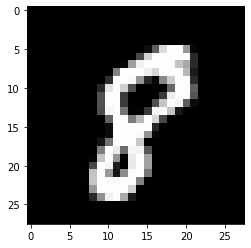

In [88]:
import matplotlib.pyplot as plt
plt.subplot()
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

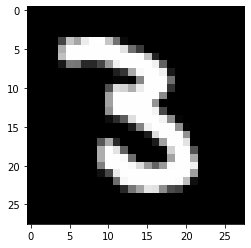

In [89]:
plt.subplot()
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

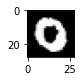

In [90]:
plt.subplot(443)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

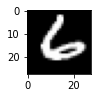

In [91]:
plt.subplot(335)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

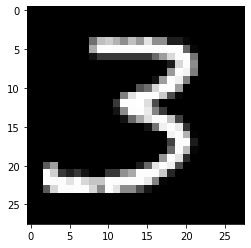

In [92]:
plt.subplot()
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))


In [93]:
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[0]

In [94]:
x_train.shape[0]

60000

In [95]:
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [96]:
input_shape=(img_rows,img_cols,1)

In [97]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [98]:
x_train /=255
x_test /= 255

In [99]:
x_train.shape

(60000, 28, 28, 1)

In [100]:
x_test.shape

(10000, 28, 28, 1)

In [101]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)


In [102]:
y_test.shape[1]

10

In [103]:
num_classes=y_test.shape[1]
num_pixels=x_train.shape[1]*x_train.shape[2]

In [104]:
num_classes

10

In [105]:
num_pixels

784

In [106]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [107]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k
from keras.optimizers import SGD 

In [108]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])



In [109]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

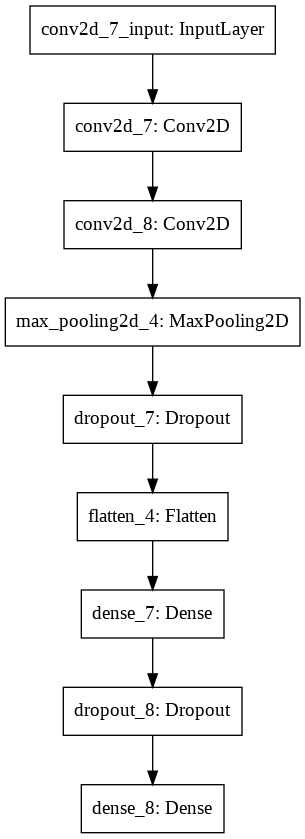

In [110]:
keras.utils.plot_model(model,to_file='model.png')

In [111]:
batch_size=32
epochs=10
history=model.fit(x_train,
                  y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test,y_test))

score=model.evaluate(x_test,y_test,verbose=0)
print ('testt loss:',score[0])
print('test accuracy:',score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 6592/60000 [==>...........................] - ETA: 2:20 - loss: 1.5814 - accuracy: 0.4989

KeyboardInterrupt: ignored

In [113]:
history.history

{'accuracy': [0.8183,
  0.91361666,
  0.93585,
  0.94888335,
  0.9572667,
  0.96346664,
  0.9677333,
  0.96961665,
  0.9716833,
  0.97438335],
 'loss': [0.5823140629013379,
  0.2847873084843159,
  0.2164489461372296,
  0.17131114952762921,
  0.1423720066025853,
  0.1246062203442057,
  0.10910372302060325,
  0.10205547816852728,
  0.0920350488456587,
  0.08554957642133038],
 'val_accuracy': [0.9419999718666077,
  0.9578999876976013,
  0.9692999720573425,
  0.9735000133514404,
  0.9769999980926514,
  0.9800000190734863,
  0.9829999804496765,
  0.9837999939918518,
  0.9843999743461609,
  0.9865000247955322],
 'val_loss': [0.195337839153409,
  0.13508808265700936,
  0.10244380282908679,
  0.08532980644591152,
  0.07004993986384943,
  0.0612764250935521,
  0.054482083199638875,
  0.05113701412738301,
  0.04914514236645773,
  0.04226433586198836]}

In [114]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

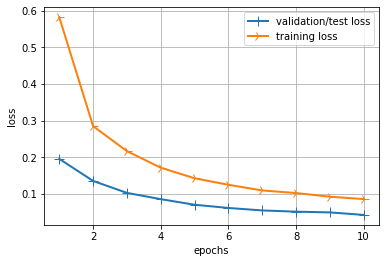

In [115]:
line1=plt.plot(epochs,val_loss_values,label="validation/test loss")
line2=plt.plot(epochs,loss_values,label='training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.grid()
plt.legend()
plt.show()

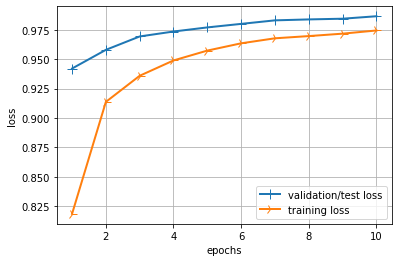

In [116]:
import matplotlib.pyplot as plt

history_dict=history.history
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_acc_values,label="validation/test loss")
line2=plt.plot(epochs,acc_values,label='training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.grid()
plt.legend()
plt.show()

In [118]:
import cv2
import numpy as np

def draw_test (name, pred, input_im):
  BLACK=[0,0,0]
  expanded_image=cv2.copyMakeborder(input_im,0,0,0,imageL.shape[0],cv2.BORDER_CONSTANT,value=BLACK)
  expanded_image=cv2.cvtcolor(expanded_image,cv2.COLOR_GRAY2BGR)
  cv2.putText(expanded_image,str(pred),(152,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,255,0),2)
  cv2.imshow(name,expanded_image)

  for i in range(0,10):
    rand=np.random.randint(0,len(x_test))
    input_im=x_test[rand]

    imageL=cv2.resize(input_im, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
    input_im=input_im.reshape(1,28,28,1)

    ##get prediction
    res=str(classifier.predict_classes(input_im,1,verbose=0)[0])
    draw_test("prediction",res,imageL)
    cv2.waitkey(0)

cv2.destroyAllWindows()
